In [218]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Timedelta
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [219]:
df = pd.read_parquet('data.parquet')

In [220]:
# Lets look at the correlation between nifty and banknifty
print(df['nifty'].corr(df['banknifty']))

0.8962741084918625


In [221]:
df.isnull().sum()

banknifty    1500
nifty        2000
tte             0
dtype: int64

In [222]:
df=df.dropna()
#df = df.ffill()


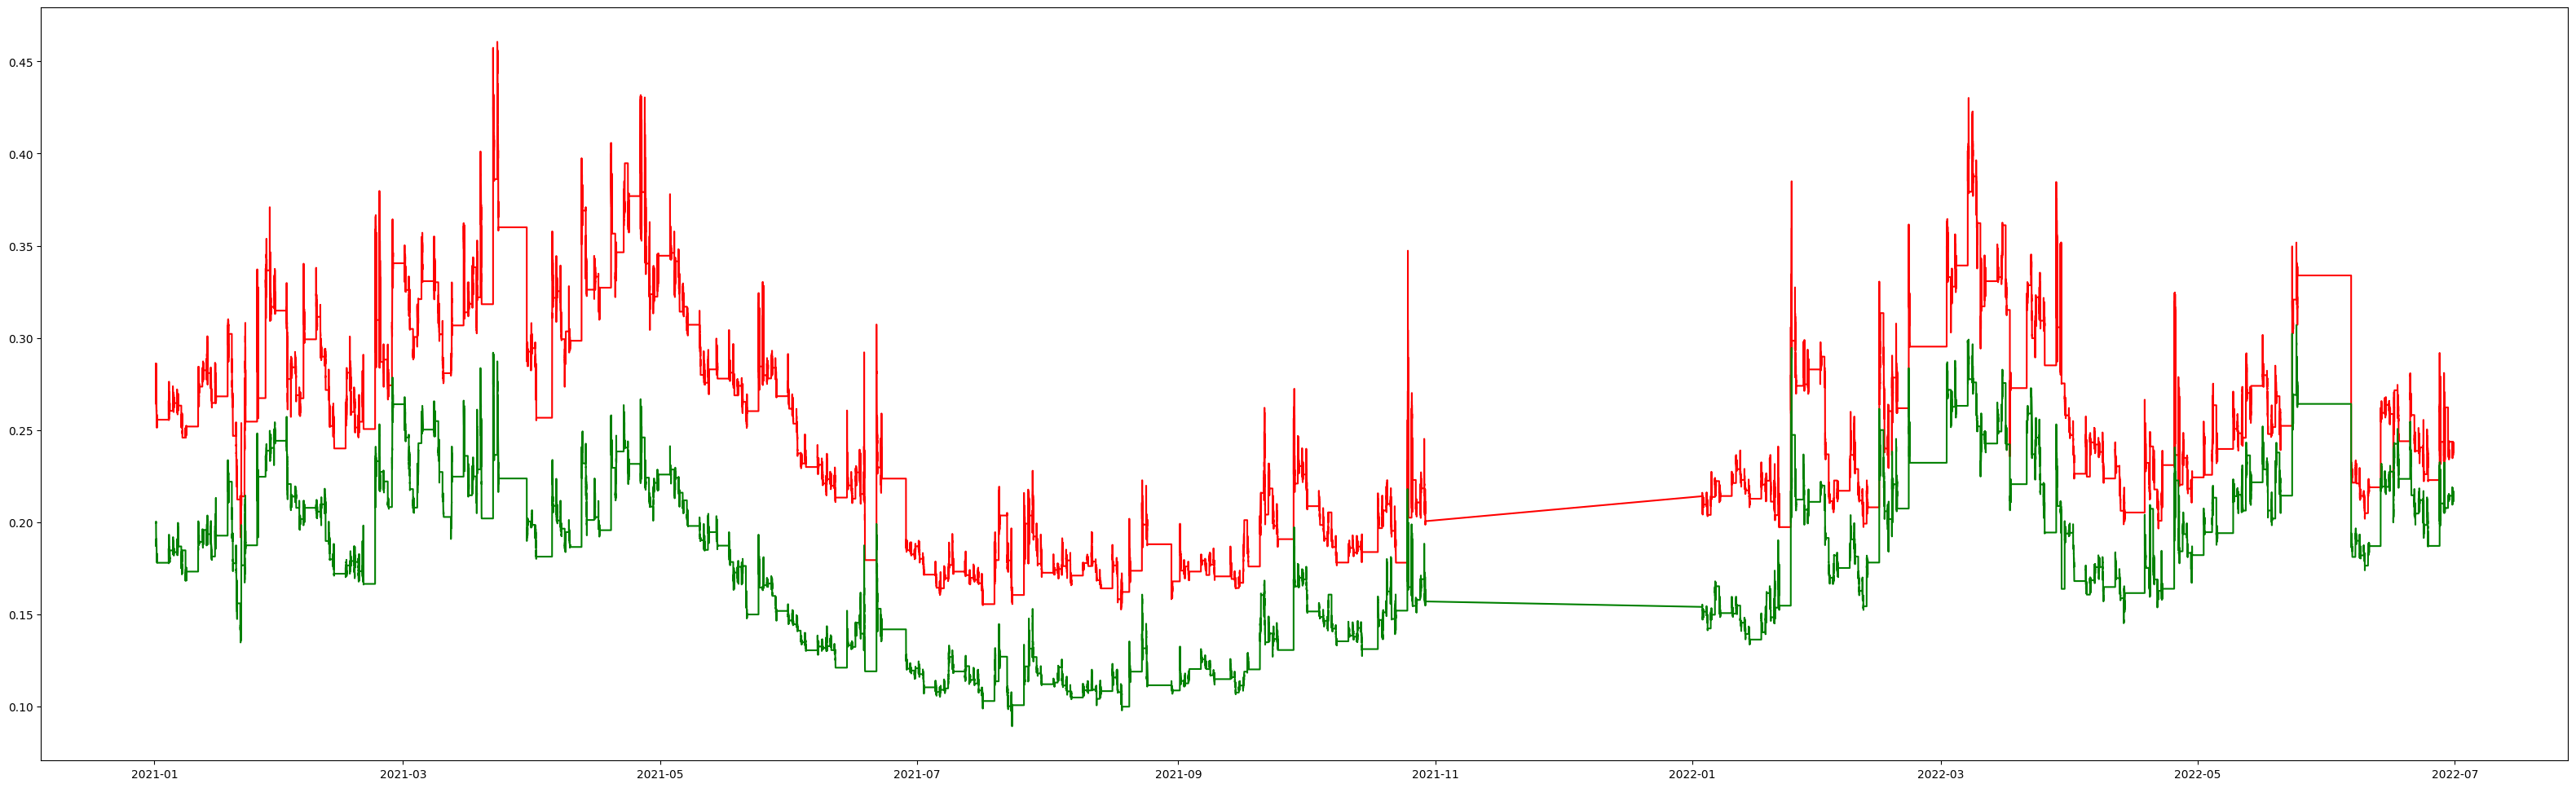

In [223]:
plt.figure(figsize=(40,12))
plt.plot(df['banknifty'],"r")
plt.plot(df['nifty'],"g")

In [224]:
df['Spread']= df['banknifty'] - df['nifty']

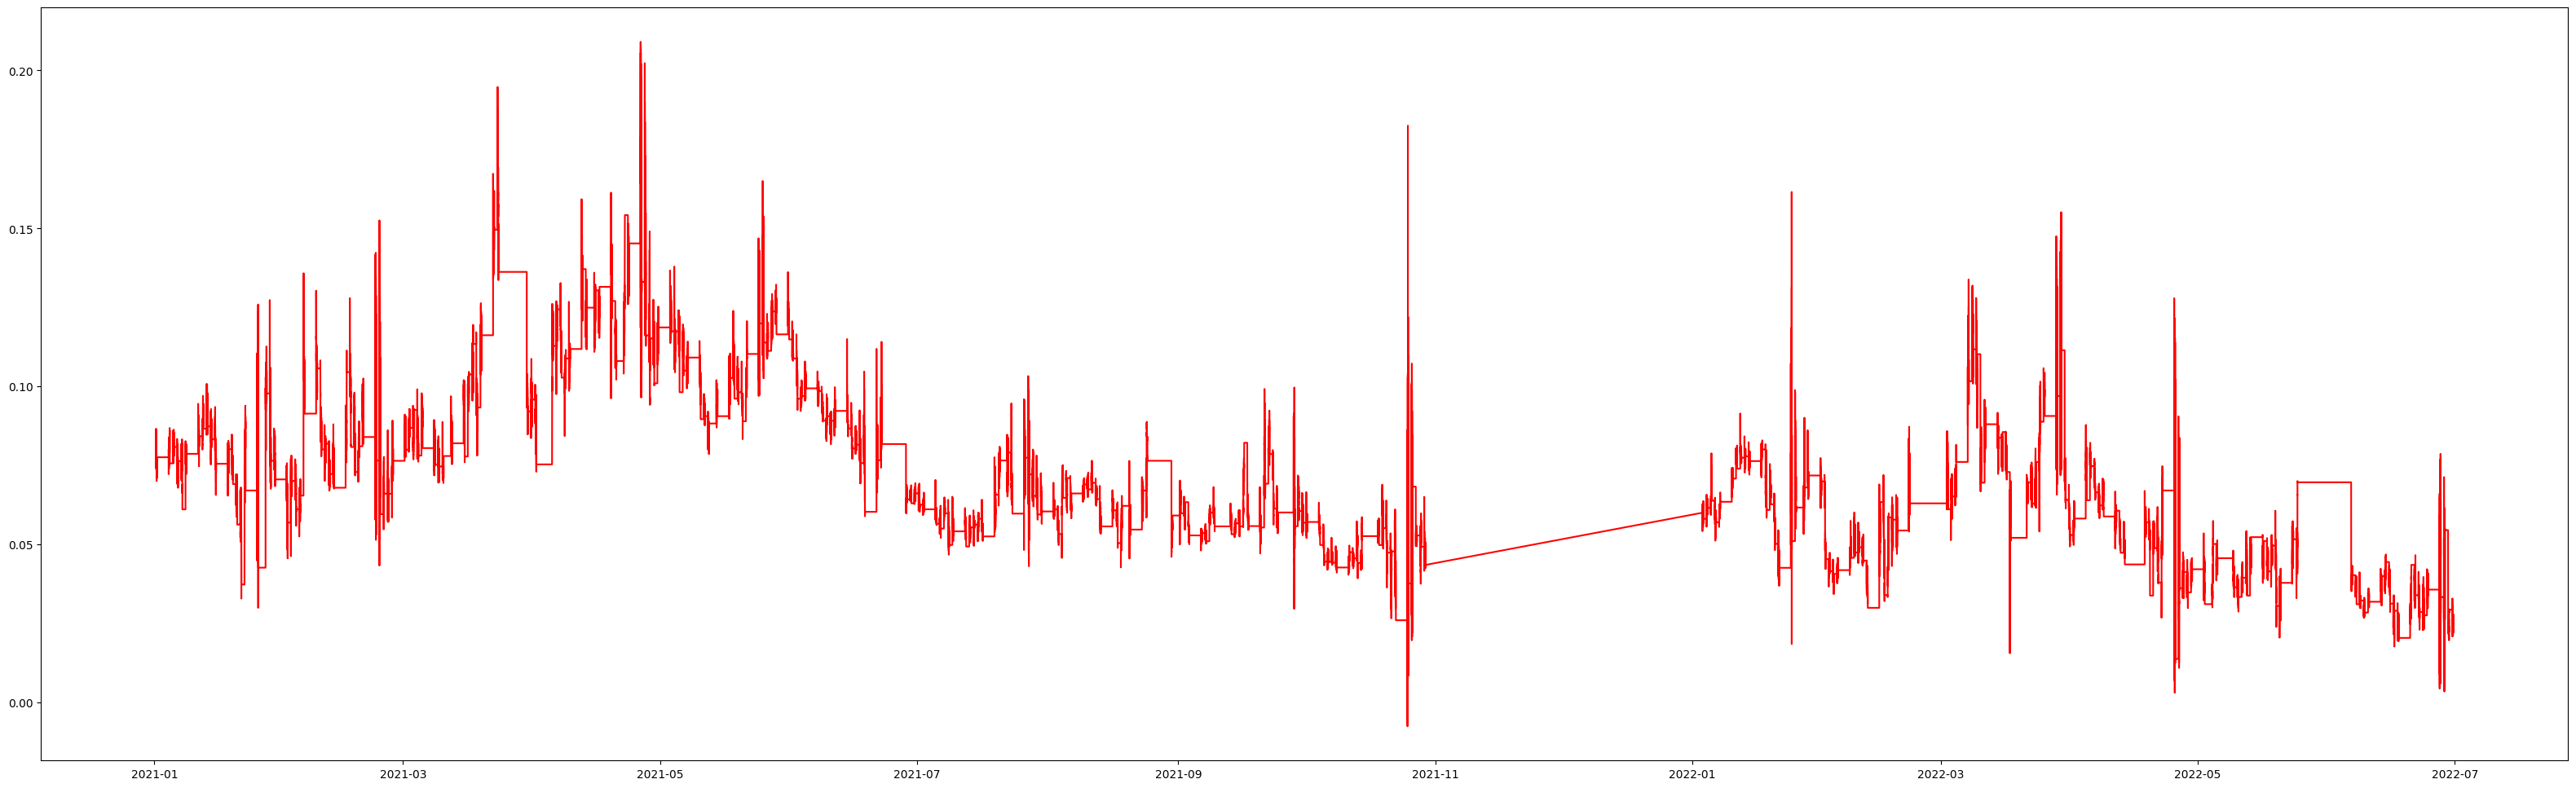

In [225]:
plt.figure(figsize=(40,12))
plt.plot(df['Spread'],"r")
plt.show()

In [226]:
df['Spread_Zscore'] = (df['Spread'] - df['Spread'].rolling(window=32).mean()) / df['Spread'].rolling(window=32).std()

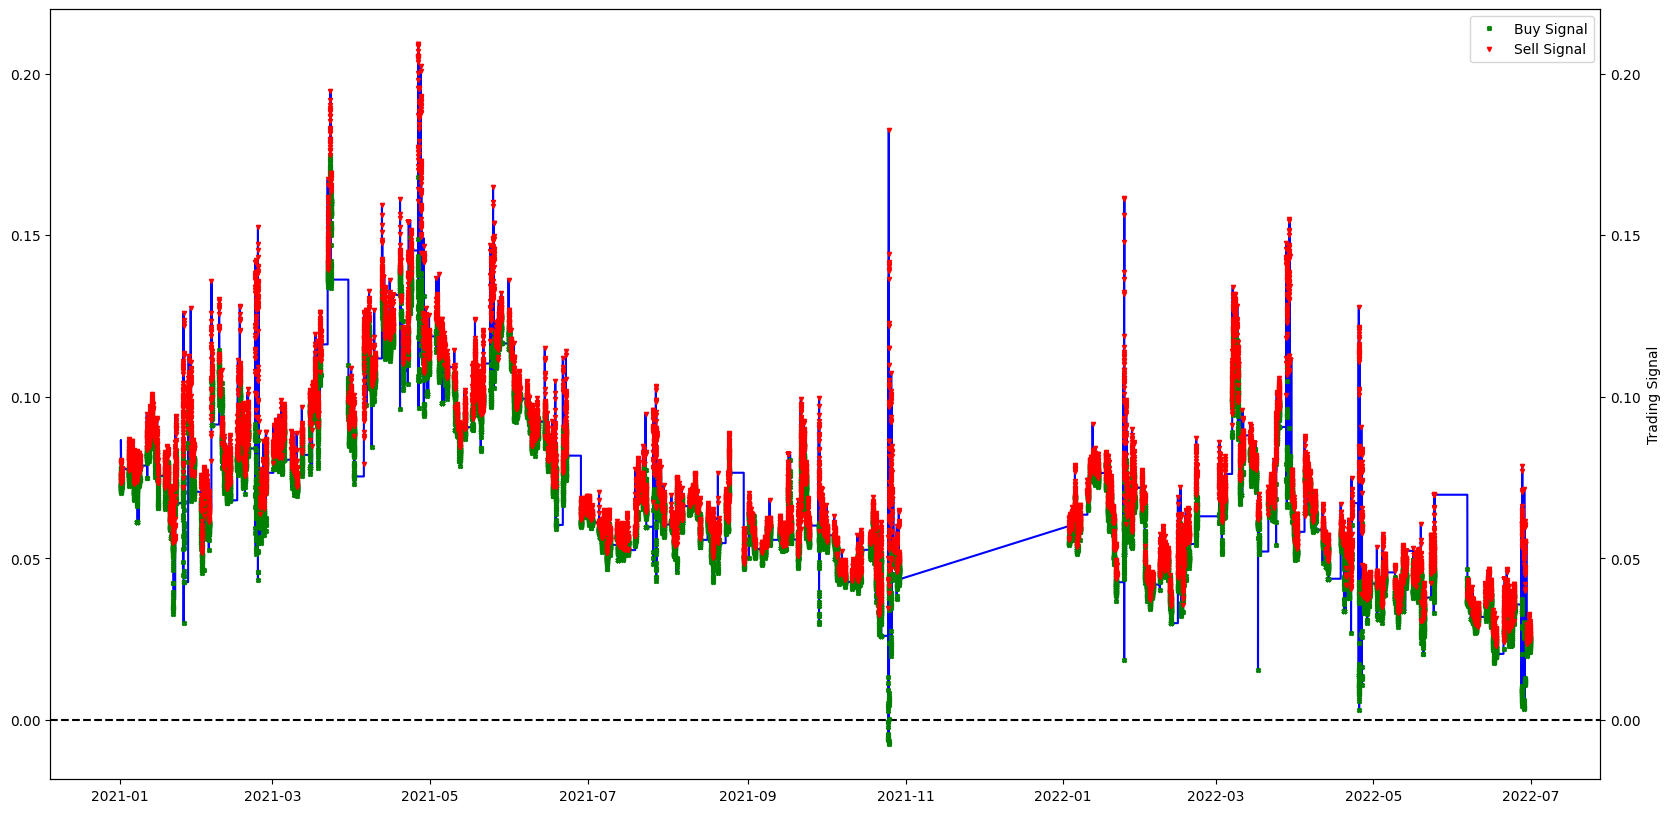

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['Signal'] = np.where(df['Spread_Zscore'] > 1, -1, np.where(df['Spread_Zscore'] < -1, 1, 0))

df['PnL'] = df['Signal'].shift(1) * df['Spread'] * df['tte'] ** 0.7

df['Cumulative_PnL'] = (1 + df['PnL'] / 100).cumprod()

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.plot(df.index, df['Spread'], label='Spread', color='blue')
ax1.axhline(0, linestyle='--', color='black', label='Spread Mean')

ax2 = ax1.twinx()

ax2.plot(df[df['Signal'] == 1].index, df['Spread'][df['Signal'] == 1], 'X', markersize=3, color='g', label='Buy Signal')

ax2.plot(df[df['Signal'] == -1].index, df['Spread'][df['Signal'] == -1], 'v', markersize=3, color='r', label='Sell Signal')

ax2.set_ylabel('Trading Signal', color='black')
ax2.tick_params('y', colors='black')

plt.legend()
plt.show()


In [228]:
# Base-Model Results:
cumulative_pnl_base_model = df['Cumulative_PnL']

absolute_PnL_base_model = cumulative_pnl_base_model[-1] - 1
print("Sharpe Ratio: {:.2%}".format(cumulative_pnl_base_model.pct_change().mean() / cumulative_pnl_base_model.pct_change().std()))
print("Base Model - Cumulative PnL: {:.4}".format(cumulative_pnl_base_model[-1]))
print("Base Model - Absolute PnL: {:.4}".format(absolute_PnL_base_model))


Sharpe Ratio: 0.31%
Base Model - Cumulative PnL: 12.13
Base Model - Absolute PnL: 11.13
